In [18]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

s3 = boto3.resource('s3')
bucket_name = 'grant-gonnerman-data-445'
bucket = s3.Bucket(bucket_name)

file_key = 'MarketingData.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading data file
marketing_data = pd.read_csv(file_content_stream)
marketing_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [2]:
# Frequency table of channels
marketing_data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

<AxesSubplot: xlabel='Channel', ylabel='Frozen'>

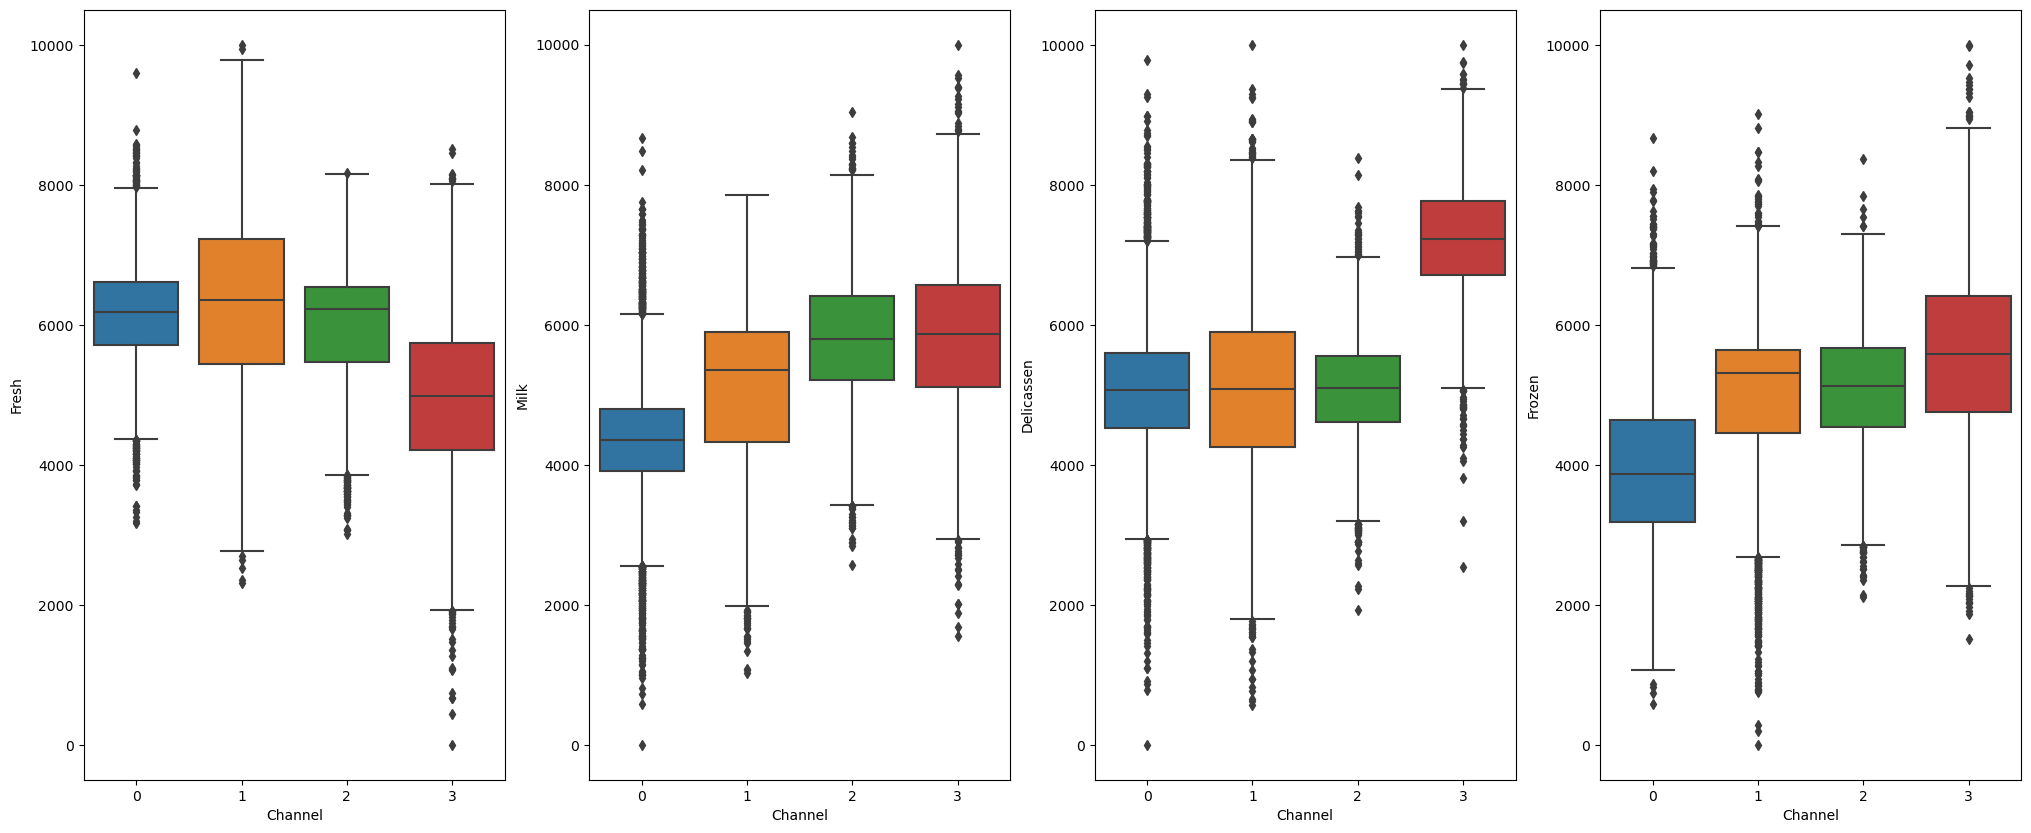

In [8]:
import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize = (25, 10))
sns.boxplot(ax = axes[0], x ='Channel', y = 'Fresh', data = marketing_data)
sns.boxplot(ax = axes[1], x ='Channel', y = 'Milk', data = marketing_data)
sns.boxplot(ax = axes[2], x ='Channel', y = 'Delicassen', data = marketing_data)
sns.boxplot(ax = axes[3], x ='Channel', y = 'Frozen', data = marketing_data)

In [ ]:
# From the above boxplots we can see that the median spent on Fresh was lower for channel 3 than in the other channels
# we can also see the inverse of that relationship for delicassen spending for channel 3 is much higher than the others

In [19]:
# defining input and target
x = marketing_data.drop(columns = 'Channel', axis = 1)
y = marketing_data['Channel']

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [ ]:
#scaling the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [23]:
# building Decision Tree model 
one_vs_rest_tree = OneVsRestClassifier(estimator = DecisionTreeClassifier()).fit(x_train, y_train)
#predicting on the test
one_vs_rest_tree_pred = one_vs_rest_tree.predict(x_test)

print(confusion_matrix(y_test, one_vs_rest_tree_pred))
print(classification_report(y_test, one_vs_rest_tree_pred))

[[785  54  33 129]
 [ 26 742  46 186]
 [ 25  19 852 102]
 [ 10  27  23 941]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1001
           1       0.88      0.74      0.81      1000
           2       0.89      0.85      0.87       998
           3       0.69      0.94      0.80      1001

    accuracy                           0.83      4000
   macro avg       0.85      0.83      0.83      4000
weighted avg       0.85      0.83      0.83      4000



In [24]:
# building logistic model 
one_vs_one_logit = OneVsOneClassifier(estimator = LogisticRegression()).fit(x_train, y_train)
#predicting on the test
one_vs_one_logit_pred = one_vs_one_logit.predict(x_test)

print(confusion_matrix(y_test, one_vs_one_logit_pred))
print(classification_report(y_test, one_vs_one_logit_pred))

[[690 177  65  69]
 [163 595 124 118]
 [ 83 189 682  44]
 [ 36  71  25 869]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1001
           1       0.58      0.59      0.59      1000
           2       0.76      0.68      0.72       998
           3       0.79      0.87      0.83      1001

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000



In [ ]:
# based on these results i would choose the decision tree classifier to predict channel 